<h1 style='text-align: center;'> Part IIB - Optimization and Machine Learning in Finance </h1> 

The _main objective_ of this PART IIB task is to design three models to predict whether the 1700 observations of 26 financial & accounting metrics are an investment grade or not. 

Here we are going to use,

- Linear regression with Ridge(or L1) and Lasso(or L2) regularization.
- Logistic regression with Ridge(or L1) and Lasso(or L2) regularization.
- Sequential Neural network model.

to predict whether the firm is investment grade or not, by splitting the dataset provided with 26 financial & accounting metrics for a set of firms in several different industries, into **80%** training and **20%** testing. 


### Data Import

Starting off with importing all the necessary packages and the data. Looking at the data, we found that the _'Rating'_ column is in string datatype, so converting the column into numerical using LabelEncoder. Then splitting the data as independent attributes **x** and target variable **y**. Then splitting the data _'x'_ and _'y'_ into two subsets - 80% for training and 20% for testing respectively with _random_state=42_.

In [1]:
import math
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# importing data
bdata = pd.read_csv('MLF_GP1_CreditScore.csv')

# preprocessing the data (changing the Rating column as labels)
lblen = LabelEncoder()
bdata['Rating'] = lblen.fit_transform(bdata['Rating'])

# splitting
x = bdata.drop(['InvGrd'], axis=1)
y = bdata['InvGrd']

x.head()
# print(y)

# bdata.head()
# bdata.describe()
#print(bdata.dtypes)

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,0
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,0
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,0
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,0
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,0


In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # training 80% test 20%

### 1. Linear Regression with regularization

Now performing linear regression using Ridge and Lasso regularization techniques. The models are trained with 80% data and tested with 20% data, and their accuracies are evaluated. Finally, they are plotted conveniently to visualize the accuracies.

For a binary prediction task, linear regression would not be a well-suited model for prediction as it wouldn't accurately capture the non-linear relationship. So, this approach with regularization achieved an accuracy of **76%** in predicting whether a firm is considered investment grade or not. 

Ridge accuracy: 0.7676470588235295
Lasso accuracy: 0.7529411764705882


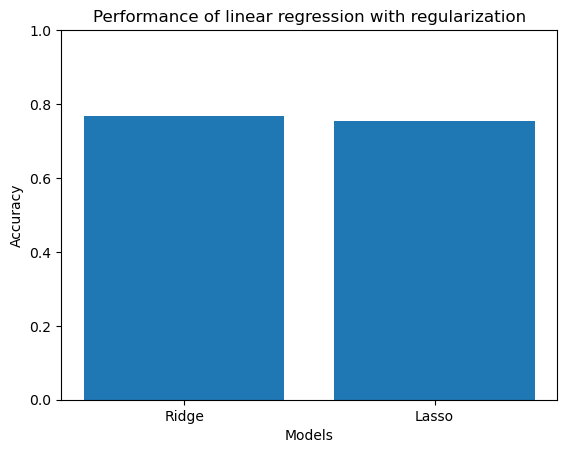

In [3]:
# Performing linear regression with Ridge & Lasso Regularization

ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)

# fitting the models to the training data
ridge_reg.fit(x_train, y_train)
lasso_reg.fit(x_train, y_train)

# prediction on the test data
ridge_preds = ridge_reg.predict(x_test)
lasso_preds = lasso_reg.predict(x_test)

# convert predictions to binary output
ridge_preds = np.where(ridge_preds > 0.5, 1, 0)
lasso_preds = np.where(lasso_preds > 0.5, 1, 0)

# printing the accuracies
ridge_accuracy = accuracy_score(y_test, ridge_preds)
lasso_accuracy = accuracy_score(y_test, lasso_preds)

print(f"Ridge accuracy: {ridge_accuracy}")
print(f"Lasso accuracy: {lasso_accuracy}")

# Plotting
# creating an histogram with the accuracies
fig, ax = plt.subplots()
ax.bar(['Ridge', 'Lasso'], [ridge_accuracy, lasso_accuracy])
ax.set_ylim([0, 1])

# defining the labels
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Performance of linear regression with regularization')

plt.show()

### 2. Logistic Regression without regularization

Then we are performing the logistic regression, but without the regularization with the maximum iteration level 1000. Following by fitting the model with training data & evaluating the model and visualizing the accuracies.

Logistic Regression training score:  0.7698529411764706
Logistic Regression test score:  0.7647058823529411




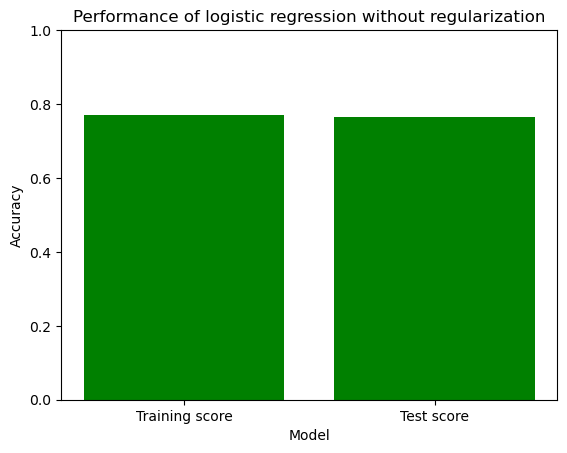

In [6]:
# Performing Logistic Regression

logreg = LogisticRegression(max_iter=10e5)

# fitting the model with training data
logreg.fit(x_train, y_train)

print("Logistic Regression training score: ", logreg.score(x_train, y_train))
print("Logistic Regression test score: ", logreg.score(x_test, y_test))
print("\n")

# Plotting
# creating an histogram with the accuracies
fig, ax = plt.subplots()
ax.bar(['Training score', 'Test score'], [logreg.score(x_train, y_train), logreg.score(x_test, y_test)], color = "green")
ax.set_ylim([0, 1])

# defining the labels
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Performance of logistic regression without regularization')

plt.show()

### 2. Logistic Regression with regularization

Here we are performing the Logistic regression with regularization. Firstly, we pipelining the model with Standard scaler, which scales the input to have zero mean and variance, and performing logistic regression with specified penalty and solver. Then the model has been fitted and the accuracies has been evaluated and presented for interpretation.

Based on the implementation, we can interpret that the accuracy achieved in predicting whether a firm is considered an investment grade or not is **77%**.
It provides a decent performance considering the complexity of the task and the limited size of the dataset. 

Logistic Regression accuracy with Ridge regularization: 0.7647058823529411
Logistic Regression accuracy with Lasso regularization: 0.7617647058823529


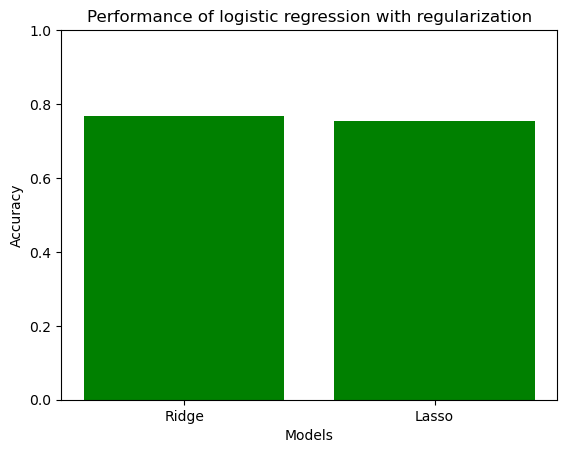

In [5]:
# Performing logistic regression with Ridge & Lasso Regularization

# pipelining with standard scaler & logistic reg with Lasso regularization(L1)
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
])

# pipelining with standard scaler & logistic reg with Ridge regularization(L2)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2', solver='lbfgs'))
])

# fitting the models with training data
lasso_pipeline.fit(x_train, y_train)
ridge_pipeline.fit(x_train, y_train)

# prediction on the test data
y_pred_lasso = lasso_pipeline.predict(x_test)
y_pred_ridge = ridge_pipeline.predict(x_test)

# calculate accuracy scores
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# printing results
print("Logistic Regression accuracy with Ridge regularization:", accuracy_ridge)
print("Logistic Regression accuracy with Lasso regularization:", accuracy_lasso)

# Plotting
# creating an histogram with the accuracies
fig, ax = plt.subplots()
ax.bar(['Ridge', 'Lasso'], [ridge_accuracy, lasso_accuracy], color = "green")
ax.set_ylim([0, 1])

# defining the labels
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Performance of logistic regression with regularization')

plt.show()

### 3. Sequential Neural network model

Here, we are importing the data once again and preprocessing it. Afterwards, the data has been split and a neural network model has been designed. The **sequential model** will be suitable for performing binary prediction. The network consists of _three layers_. The first two layers are the _dense layers_, each having 64 or 32 units and a relu activation function. Final layer has one unit and a sigmoid activation function. The **Adam optimizer** and binary cross-entropy loss function are then used to construct the model. The model is trained for 100 epochs with a batch size of 32 during training, and validation data is used to track the model's effectiveness on undiscovered data. Then finally the accuracy of the model has been printed and presented.

In [7]:
# Loading the dataset again
datf = pd.read_csv('MLF_GP1_CreditScore.csv')

# preprocessing the data (changing the Rating column as labels)
lblen = LabelEncoder()
datf['Rating'] = lblen.fit_transform(datf['Rating'])

# splitting the data 
x = datf.drop(['InvGrd'], axis=1)
y = datf['InvGrd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #training 80% test 20%

x.head() # as you can see we also added 'Rating' as labels

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,0
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,0
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,0
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,0
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,0


In [8]:
# Building the sequential neural network as we want to perform binary prediction, from tensorflow.keras
seq_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling & training the model
seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
plotdata = seq_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test)) #setting epochs=100 for at most accuracy

# evaluating the model
test_loss, test_acc = seq_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
43/43 [==============================] - 1s 4ms/step - loss: 1.0779 - accuracy: 0.7081 - val_loss: 0.6405 - val_accuracy: 0.6971
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 0.7662 - accuracy: 0.7331 - val_loss: 0.5861 - val_accuracy: 0.7382
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.7559 - val_loss: 0.5721 - val_accuracy: 0.7471
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7544 - val_loss: 0.5458 - val_accuracy: 0.7559
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.7654 - val_loss: 0.5318 - val_accuracy: 0.7735
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7684 - val_loss: 0.5220 - val_accuracy: 0.7735
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7662 - val_loss: 0.5273 - val_accuracy: 0.7618
Epoch 8/100
4

Epoch 59/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9331 - val_loss: 0.2028 - val_accuracy: 0.9324
Epoch 60/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.9206 - val_loss: 0.2059 - val_accuracy: 0.9118
Epoch 61/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.9353 - val_loss: 0.1844 - val_accuracy: 0.9324
Epoch 62/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.9456 - val_loss: 0.1893 - val_accuracy: 0.9118
Epoch 63/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9456 - val_loss: 0.1719 - val_accuracy: 0.9471
Epoch 64/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9456 - val_loss: 0.1765 - val_accuracy: 0.9353
Epoch 65/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9515 - val_loss: 0.1684 - val_accuracy: 0.9382
Epoch 

As we interpret from the training epochs, the model evaluates the data exceptionally well, achieving over **93%** accuracy in classifying the credit rating of firms into one of the 16 categories. This results that the sequential neural network approach can be the effective method to predict investment grade status with a high degree of accracy.

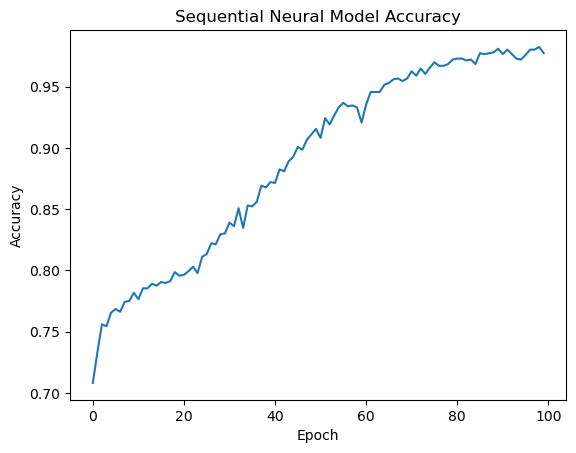

In [9]:
# plotting training and validation accuracy
plt.plot(plotdata.history['accuracy'])
plt.title('Sequential Neural Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()